In [1]:
import pandas as pd
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
font = {'size': 16}
matplotlib.rc('font', **font)

In [2]:
basedir = './국토교통부_실거래가_공개시스템/땅값분석/'
yunrip_df = pd.read_csv(basedir + 'yunrip_30.csv')
commerce_df = pd.read_csv(basedir + 'commerce_30.csv')
land_df = pd.read_csv(basedir + 'land.csv')

In [3]:
common_cols = ['시군구', '번지', '용도지역', '도로조건', '계약날짜', '대지면적(㎡)', '거래금액(만원)', '단가(㎡)', '단가(평)', '거래유형', '건물연식']
common_df = pd.concat([yunrip_df[common_cols], commerce_df[common_cols], land_df[[col for col in land_df.columns if col not in ['지목', '지분구분', '해제사유발생일']]]])
print(common_df.shape)
common_df.head()

(87439, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2019-03-18,21.53,38000.0,1764.979099,5834.641431,연립/다세대,31.0
1,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-10-16,44.19,65000.0,1470.921023,4862.548654,연립/다세대,32.0
2,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-12-23,21.53,31000.0,1439.851370,4759.839062,연립/다세대,32.0
3,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2018-06-14,45.00,52000.0,1155.555556,3820.018222,연립/다세대,30.0
4,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2019-03-05,45.00,50000.0,1111.111111,3673.094444,연립/다세대,31.0


In [4]:
common_df['계약날짜'] = pd.to_datetime(common_df['계약날짜'], format='%Y-%m-%d')
common_df.head()

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2019-03-18,21.53,38000.0,1764.979099,5834.641431,연립/다세대,31.0
1,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-10-16,44.19,65000.0,1470.921023,4862.548654,연립/다세대,32.0
2,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-12-23,21.53,31000.0,1439.851370,4759.839062,연립/다세대,32.0
3,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2018-06-14,45.00,52000.0,1155.555556,3820.018222,연립/다세대,30.0
4,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2019-03-05,45.00,50000.0,1111.111111,3673.094444,연립/다세대,31.0


In [13]:
target = '구로동'
target_purpose = '2종일반'
계약일자시점 = 2018

In [14]:
target_df = common_df[(common_df['시군구'].str.contains(target))&(common_df['용도지역'].str.contains(target_purpose))&(common_df['계약날짜'].dt.year >= 계약일자시점)].sort_values(['단가(평)'], ascending=False)
print(target_df.shape)
target_df.head()

(188, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
5042,서울특별시 구로구 구로동,2*,제2종일반주거,12m미만,2018-06-01,98.80,176000.0,1781.376518,5888.847773,상업/업무,32.0
8153,서울특별시 구로구 구로동,7**,제2종일반주거,25m미만,2020-03-06,66.00,110000.0,1666.666667,5509.641667,상업/업무,50.0
9776,서울특별시 구로구 구로동,7**,제2종일반주거,25m미만,2021-02-20,76.00,120000.0,1578.947368,5219.660526,상업/업무,52.0
38892,서울특별시 구로구 구로동,2**,제2종일반주거지역,12m미만,2020-12-08,145.00,212600.0,1466.206897,4846.964766,토지,NaN
4792,서울특별시 구로구 구로동,777-24,제2종일반주거지역,8m미만,2021-01-28,13.55,16500.0,1217.712177,4025.494649,연립/다세대,32.0


In [15]:
target_df = target_df[target_df['단가(평)'] <= 5000]

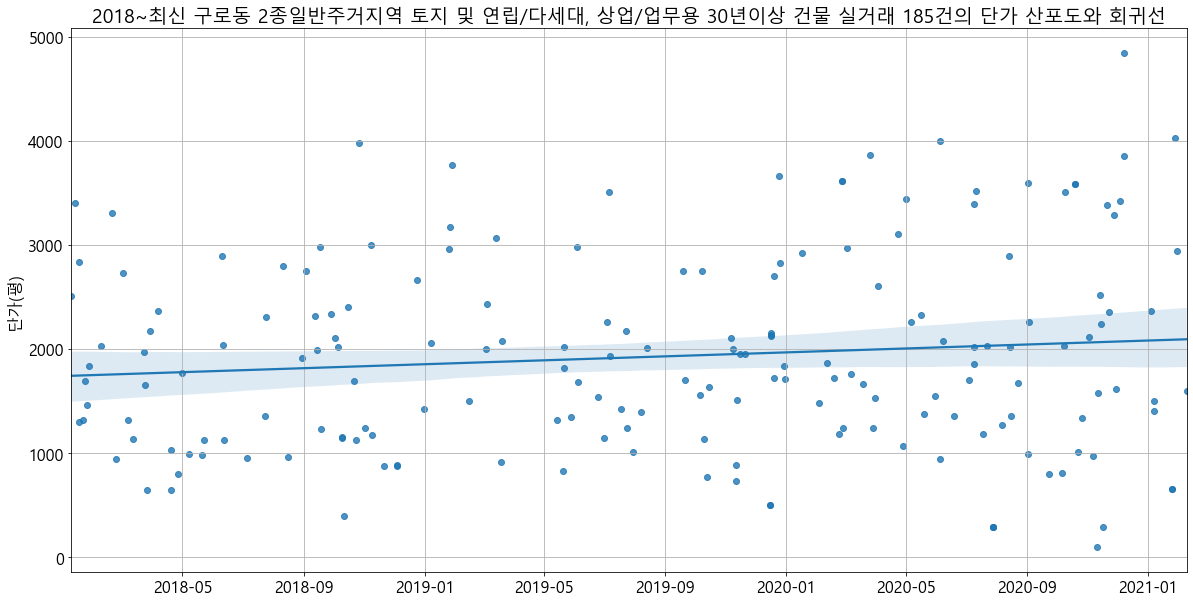

In [25]:
f, ax = plt.subplots(figsize=(20,10))
plt.title('{}~최신 {} {}주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 산포도와 회귀선'.format(계약일자시점, target, target_purpose, target_df.shape[0]))
plt.grid(True)
ax.xaxis.update_units(target_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(target_df['계약날짜']), y=target_df['단가(평)'])
plt.savefig(basedir + '구로동2종일반/산포도.png')

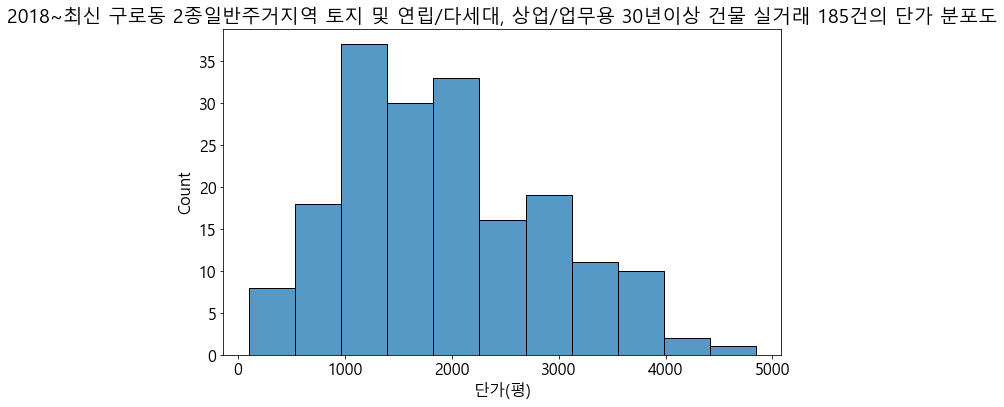

거래량: 185.0
평균: 1930.5660810432648
표준편차: 939.8263786354863
최소: 99.72202111613876
25분위: 1237.9201400195377
중간값: 1818.18175
75분위: 2513.90494296578
최대: 4846.964765517242


<Figure size 432x288 with 0 Axes>

In [30]:
font = {'size': 16}
matplotlib.rc('font', **font)
f, ax = plt.subplots(figsize=(10,6))
plt.title('{}~최신 {} {}주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(계약일자시점, target, target_purpose, target_df.shape[0]))
sns.histplot(target_df['단가(평)'])
plt.savefig(basedir + '구로동2종일반/분포도.png')
plt.show()
plt.clf()

description = target_df['단가(평)'].describe()
print('거래량:', description['count'])
print('평균:', description['mean'])
print('표준편차:', description['std'])
print('최소:', description['min'])
print('25분위:', description['25%'])
print('중간값:', description['50%'])
print('75분위:', description['75%'])
print('최대:', description['max'])


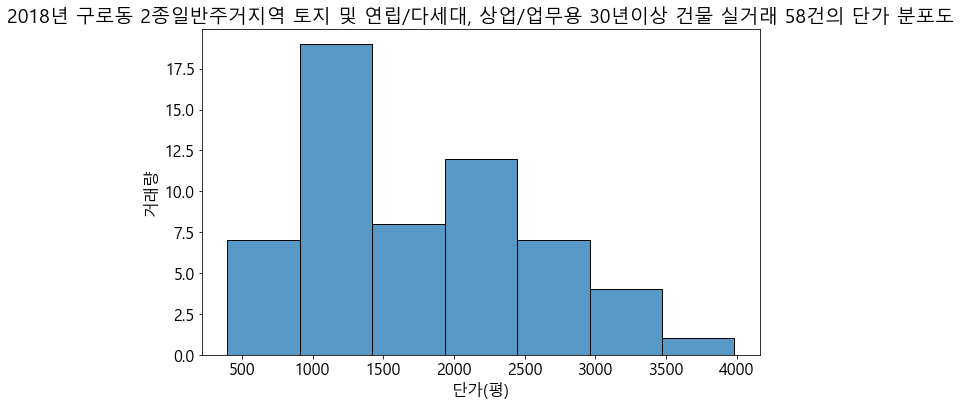

거래량: 58.0
평균: 1762.0342882068057
표준편차: 813.4897458555791
최소: 396.6942
25분위: 1130.0870665437062
중간값: 1671.7827000000002
75분위: 2334.1057094985963
최대: 3982.559881889764


<Figure size 432x288 with 0 Axes>

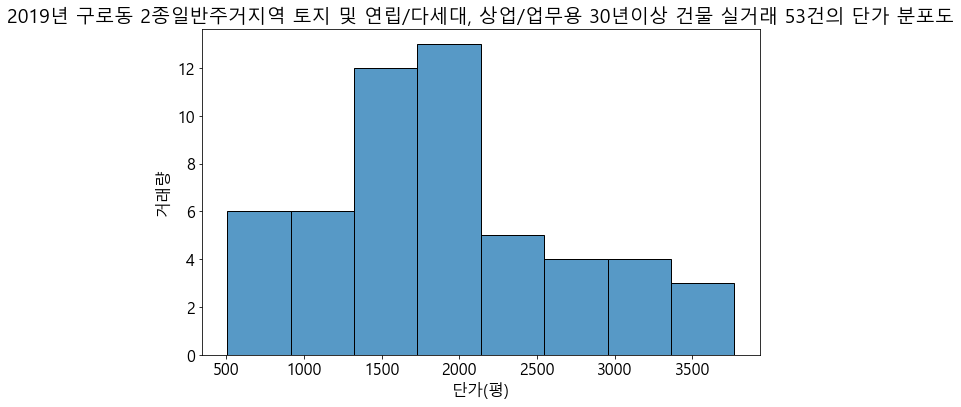

거래량: 53.0
평균: 1906.0811486587795
표준편차: 786.7350663965885
최소: 506.38615681818186
25분위: 1394.0057228915662
중간값: 1932.8178427419357
75분위: 2179.901702898551
최대: 3769.754824561403


<Figure size 432x288 with 0 Axes>

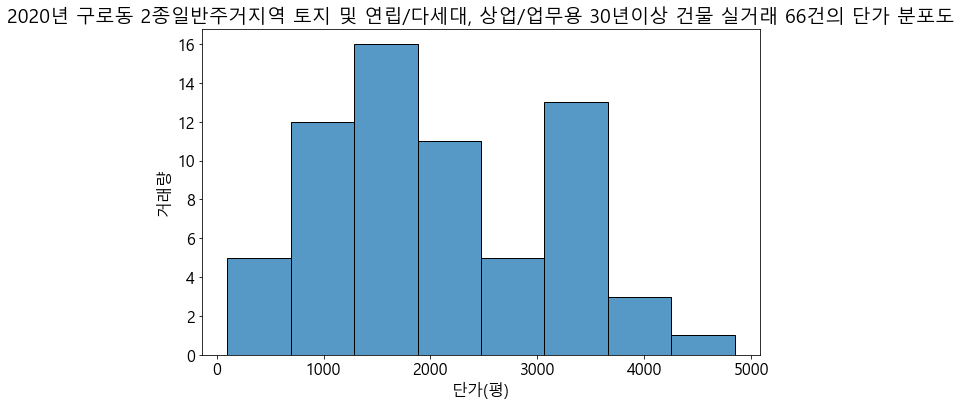

거래량: 66.0
평균: 2102.549756530074
표준편차: 1106.4730751896755
최소: 99.72202111613876
25분위: 1287.1171974366848
중간값: 1940.6347257469502
75분위: 3073.319234607708
최대: 4846.964765517242


<Figure size 432x288 with 0 Axes>

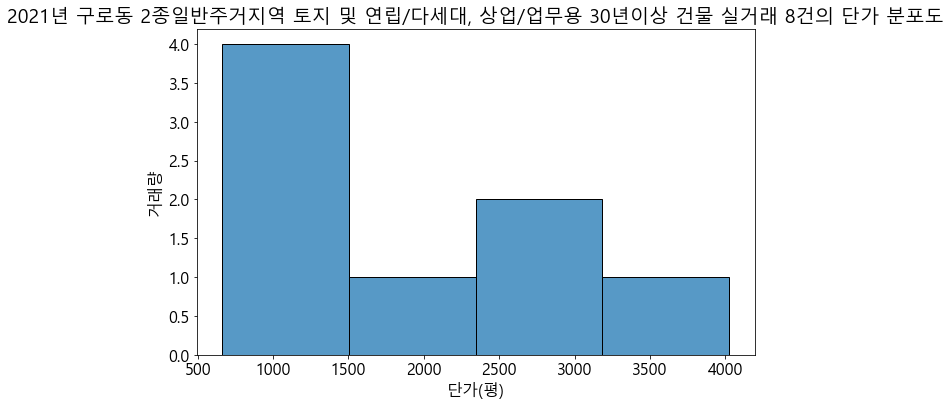

거래량: 8.0
평균: 1895.7689333886374
표준편차: 1158.6212406266231
최소: 661.157
25분위: 1221.303902777778
중간값: 1547.945793220711
75분위: 2512.160577867024
최대: 4025.494649446495


<Figure size 432x288 with 0 Axes>

In [27]:
for year in sorted(target_df['계약날짜'].dt.year.unique()):
    year_df = target_df[target_df['계약날짜'].dt.year == year]
    
    f, ax = plt.subplots(figsize=(10,6))
    plt.title('{}년 {} {}주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(year, target, target_purpose, year_df.shape[0]))
    plt.ylabel('거래량')
    sns.histplot(year_df['단가(평)'])
    plt.savefig(basedir + '구로동2종일반/{}분포도.png'.format(year))
    plt.show()
    plt.clf()
    
    description = year_df['단가(평)'].describe()
    print('거래량:', description['count'])
    print('평균:', description['mean'])
    print('표준편차:', description['std'])
    print('최소:', description['min'])
    print('25분위:', description['25%'])
    print('중간값:', description['50%'])
    print('75분위:', description['75%'])
    print('최대:', description['max'])

In [21]:
target_df = target_df.sort_values(['단가(평)'], ascending=False).reset_index(drop=True)

In [22]:
target_df.head(20)

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 구로구 구로동,2**,제2종일반주거지역,12m미만,2020-12-08,145.00,212600.0,1466.206897,4846.964766,토지,NaN
1,서울특별시 구로구 구로동,777-24,제2종일반주거지역,8m미만,2021-01-28,13.55,16500.0,1217.712177,4025.494649,연립/다세대,32.0
2,서울특별시 구로구 구로동,252-0,제2종일반주거지역,8m미만,2020-06-05,18.18,22000.0,1210.121012,4000.399890,연립/다세대,38.0
3,서울특별시 구로구 구로동,152-4,제2종일반주거지역,8m미만,2018-10-26,12.70,15300.0,1204.724409,3982.559882,연립/다세대,49.0
4,서울특별시 구로구 구로동,252-13,제2종일반주거지역,8m미만,2020-03-26,23.95,28000.0,1169.102296,3864.800835,연립/다세대,43.0
5,서울특별시 구로구 구로동,7**,제2종일반주거지역,8m미만,2020-12-08,169.00,197400.0,1168.047337,3861.313367,토지,NaN
6,서울특별시 구로구 구로동,7**,제2종일반주거,25m미만,2019-01-28,228.00,260000.0,1140.350877,3769.754825,상업/업무,57.0
7,서울특별시 구로구 구로동,155-8,제2종일반주거지역,8m미만,2019-12-25,14.40,15950.0,1107.638889,3661.616024,연립/다세대,54.0
8,서울특별시 구로구 구로동,252-0,제2종일반주거지역,8m미만,2020-02-27,18.18,19900.0,1094.609461,3618.543537,연립/다세대,38.0
9,서울특별시 구로구 구로동,252-0,제2종일반주거지역,8m미만,2020-02-27,18.18,19900.0,1094.609461,3618.543537,연립/다세대,38.0


In [23]:
target_df.tail(20)

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
165,서울특별시 구로구 구로동,1255-0,제2종일반주거지역,8m미만,2018-11-21,81.33,21500.0,264.355097,873.901113,연립/다세대,35.0
166,서울특별시 구로구 구로동,1255-0,제2종일반주거지역,8m미만,2018-12-04,81.33,21500.0,264.355097,873.901113,연립/다세대,35.0
167,서울특별시 구로구 구로동,7**,제2종일반주거,8m미만,2019-05-21,26.00,6500.0,250.000000,826.446250,상업/업무,36.0
168,서울특별시 구로구 구로동,777-4,제2종일반주거지역,8m미만,2020-10-06,20.25,4950.0,244.444444,808.080778,연립/다세대,31.0
169,서울특별시 구로구 구로동,1255-0,제2종일반주거지역,8m미만,2018-04-26,81.33,19800.0,243.452601,804.801955,연립/다세대,35.0
170,서울특별시 구로구 구로동,5**,제2종일반주거지역,8m미만,2020-09-23,33.00,8000.0,242.424242,801.402424,토지,NaN
171,서울특별시 구로구 구로동,522-6,제2종일반주거지역,8m미만,2019-10-13,34.00,8000.0,235.294118,777.831765,연립/다세대,32.0
172,서울특별시 구로구 구로동,7**,제2종일반주거지역,8m미만,2019-11-11,195.00,43290.0,222.000000,733.884270,토지,NaN
173,서울특별시 구로구 구로동,5**,제2종일반주거지역,8m미만,2021-01-25,4.00,800.0,200.000000,661.157000,토지,NaN
174,서울특별시 구로구 구로동,5**,제2종일반주거지역,-,2021-01-25,1.00,200.0,200.000000,661.157000,토지,NaN


In [24]:
target_df.to_excel('./국토교통부_실거래가_공개시스템/땅값분석/구로동2종일반/구로동_2종일반_땅값분석.xlsx', index=False)